#                                          پیش بینی سرطان ریه با یادگیری ماشین  

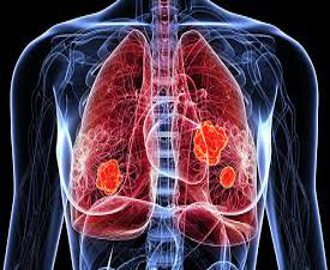

In [1]:

from PIL import Image
img = Image.open('images.jfif')
new_img = img.resize((330, 270))
new_img.save('img_400.jpg')
new_img


### فراخوان کتابخانه های لازم

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score,precision_score,recall_score
, confusion_matrix, plot_confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## مقدمه 
### در این پروژه، هدف تجزیه و تحلیل داده های مربوط به بیماران سرطان ریه و طراحی یک مدل پیش بینی طبقه بندی 'با نطارت' برای پیش بینی دقیق سرطان براساس ویژگی های مختلف مثل سیگار کشیدن، مصرف الکل و علائم مختلف مثل سرفه، خس خس سینه، مشکلات بلع و ... است 


## بیان مساله

### سرطان ریه سالانه سومین سرطان کشنده در آمریکاست
### سرطان ریه معمولا در مراحل پیشرفته تشخیص داده می شود و این کار فرصت درمان را از بیمار می گیرد
### پیش بینی سرطان ریه به افراد کمک می کند تا ریسک سرطان خود را بدانند و  زودتر وباآگاهی، تصمیم مناسب را برای درمان بگیرند

## مجموعه داده ها

## بخش 1 - پیش پردازش داده ها

### خواندن داده ها

In [3]:
data = pd.read_csv('survey lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


### نمایش 5 نمونه، اول داده ها

In [4]:
data.head().T

,0,1,2,3,4
GENDER,M,M,F,M,F
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


In [5]:
# شکل مجموعه داده
data.shape

(309, 16)

In [6]:
# اطلاعات مجموعه داده
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### توصیف آماری داده ها

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


#### جدول بالا آمار توصیفی متغیرهای پیوسته داده ها را نشان می دهد. با توجه به این که غیر از سن بقیه متغیرها دارای مقادیر 1 و 2 هستند، تنها می توان اطلاعات آماری متغیر سن را نتیجه گرفت .  مثلا میانگین سن بیماران 62 سال است. برای بقیه آگاهی ها نیاز به مصورسازی و انجام عملیات تحلیل آماری مرتبط است

###   (بررسی مقادیر مفقوده)Missing Values 

In [8]:
data.isna().sum().to_frame()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


####            --------مقادیر مفقوده نداریم

### بررسی متغیرهای اسمی

In [9]:
data.describe(include=object)

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [10]:
data.GENDER.value_counts()

M    162
F    147
Name: GENDER, dtype: int64

### بررسی توازن کلاس ها

In [11]:
data.LUNG_CANCER.value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

#### مجموعه داده نامتوازن است و کلاس مثبت سرطان ریه حدود چهار برابر کلاس منفی است

###   با توجه به این که غیر از سن بقیه متغیرها دارای مقادیر 1 و 2 هستند، تنها می توان اطلاعات آماری متغیر سن را نتیجه گرفت . برای بقیه آگاهی ها نیاز به مصورسازی و انجام عملیات تحلیل آماری مرتبط است

##  آنالیزهای لازم برای مصورسازی⨝ 

####     برای مصورسازی قابل درک تر همه مقادیر دسته ای را به متغیر عددی تبدیل می کنیم
####  جایگزین می کنیم  "NO" و "YES" همه 2 ها و 1 ها را با 
####  جایگزین می کنیم  "Female" و "Male"  ها را با"F" ها و "M" همه

In [12]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head() 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


### بررسی موارد سرطان ریه مثبت

In [13]:
# ایجاد یک دیتافریم حاوی تنها موارد مثبت
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


###  افرادی که سرطان ریه دارند حداقل بین 7تا9 مورد از ویژگی ها (سیگار ، انگشتان زرد، اضطراب و...) را دارند

In [14]:
# ایجاد یک دیتافریم حاوی تنها موارد منفی
data_temp_neg = data_temp[data_temp["LUNG_CANCER"] == "NO"]
data_temp_neg.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO
8,Female,68,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,NO
12,Female,60,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,NO


###   افرادی که سرطان ریه" ندارند" حداقل بین 3تا6  مورد از ویژگی ها (سیگار ، انگشتان زرد، اضطراب و...) را دارند

## بخش 2 - مصورسازی داده ها

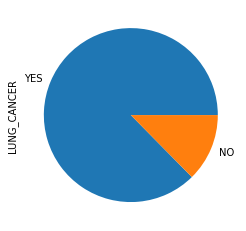

In [15]:
# نمودار پای برای، کلاس مثبت و منفی سرطان ریه
data.LUNG_CANCER.value_counts().plot.pie()
plt.show()

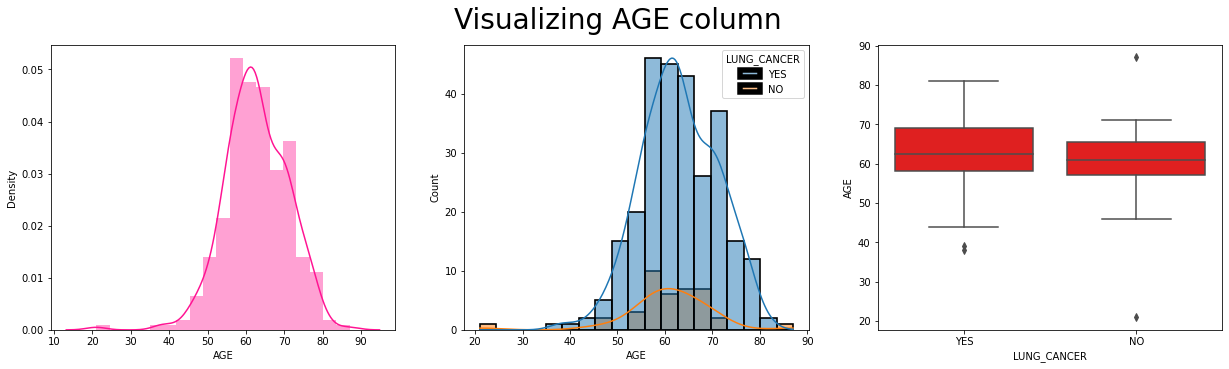

In [16]:
fig,ax = plt.subplots(1,3,figsize=(21,5.25))
sns.distplot(data['AGE'],ax=ax[0],color='deeppink')
sns.histplot(data =data,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True  ,lw=5.5)
sns.boxplot(x=data['LUNG_CANCER'],y=data['AGE'],ax=ax[2],color="red")
plt.suptitle("Visualizing AGE column",size=28)
plt.show()

### سوال 1: مساله از چه نوعی است، طبقه بندی یا رگرسیون؟
### با توجه به داشتن متغیر کلاس مثبت شدن یا منفی شدن سرطان ریه، مساله از نوع طبقه بندی دودویی است 

###      سوال :   آیا سن بر مثبت شدن یا منفی شدن سرطان ریه موثر است؟ 

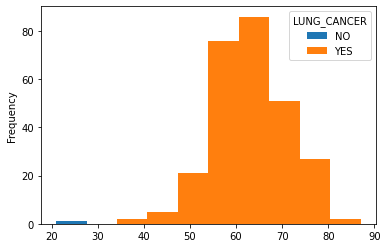

In [17]:
# رسم نمودار جدول محوری سن بر اساس مثبت شدن یا منفی شدن سرطان ریه     1-1    
data.pivot(columns="LUNG_CANCER", values="AGE").plot.hist() 
plt.show()

Patients with Lung Cancer mean age 62.95185185185185
Patients without Lung Cancer mean age 60.743589743589745


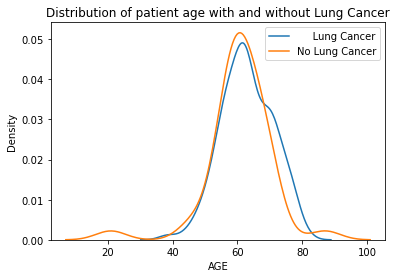

In [18]:
data_cancer = data[data['LUNG_CANCER']=='YES']
data_no_cancer = data[data['LUNG_CANCER']=='NO']

sns.kdeplot(data=data_cancer['AGE'], shade=False, label='     Lung Cancer')
sns.kdeplot(data=data_no_cancer['AGE'], shade=False, label ='No Lung Cancer')
plt.legend()
plt.title('Distribution of patient age with and without Lung Cancer')

print("Patients with Lung Cancer mean age", data_cancer['AGE'].mean())
print('Patients without Lung Cancer mean age', data_no_cancer['AGE'].mean())

###   جواب: توزیع سنی بیماران نشان می دهد که رنج سنی بیماران سرطان ریه دهه 60 سالگی است و کیس های مثبت سرطان بیشتر در سنین بالاتر تشخیص داده می شوند.

###    سوال 2: آیا جنسیت در ابتلای به سرطان ریه موثر است؟

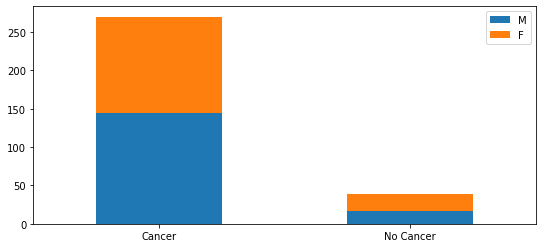

In [19]:
# 1-2     هیستوگرام سرطان ریه بر اساس جنسیت
Cancer = data[data['LUNG_CANCER']=='YES']['GENDER'].value_counts()
No_Cancer = data[data['LUNG_CANCER']=='NO']['GENDER'].value_counts()
Cancerous = pd.DataFrame([Cancer,No_Cancer])
Cancerous.index = ['Cancer','No Cancer']
Cancerous.plot(kind='bar',stacked=True, figsize=(9,4), rot=0)
plt.show()

In [20]:
# نمونه های مثبت بر اساس جنسیت
sample = data[data['LUNG_CANCER']=='YES']['GENDER'].value_counts()
pop = sample.sum()
# درصد مردان با سرطان مثبت
male_percent = round(sample[0]/pop, 2)
female_percent = round(1- male_percent, 2)
# خطای استاندارد
se = round(np.sqrt(male_percent*female_percent/pop), 2)
# فاصله اطمینان برای بررسی سرطان ریه در مردان
print('Our Confidence Invterval for Male and getting Cancer is: CI = ', round(male_percent - 2*se, 2), 'to ', round(male_percent+2*se, 2))

Our Confidence Invterval for Male and getting Cancer is: CI =  0.48 to  0.6



###  جواب:     موارد مثبت سرطان ریه در مردان با کمترین فاصله اطمینان از 0.48 است و بنابراین این فرضیه چندان درست به نظر نمی رسد

###   سوال 3: آیا سیگار در ابتلا به سرطان ریه موثر است؟

### 1-3    بررسی موارد موثر بر مثبت شدن سرطان ریه (سیگار و الکل) برحسب جنسیت

[Text(0.5, 1.0, 'Smoking in Non-Cancer patients')]

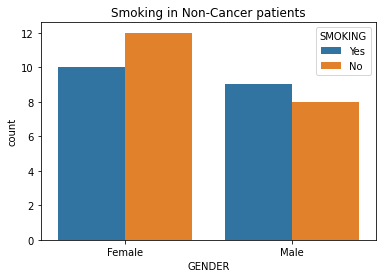

In [21]:
# هستوگرام موارد منفی سرطان ریه بر اساس جنسیت و سیگار کشیدن
sns.countplot(data=data_temp_neg, x="GENDER", hue="SMOKING", 
              hue_order=["Yes","No"]).set(title='Smoking in Non-Cancer patients')

[Text(0.5, 1.0, 'Effects of Smoking')]

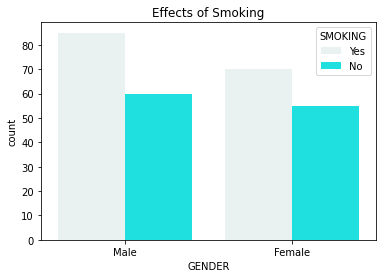

In [22]:
# هستوگرام موارد مثبت سرطان ریه بر اساس جنسیت و سیگار کشیدن
sns.countplot(data=data_temp_pos, x="GENDER", hue="SMOKING", color='cyan',
              hue_order=["Yes","No"]).set(title='Effects of Smoking')

In [23]:
# نمونه های مثبت بر اساس سیگار کشیدن
sample = data[data['LUNG_CANCER']=='YES']['SMOKING'].value_counts()
pop = sample.sum()
# درصد سیگاری های با سرطان مثبت
smoking_percent = round(sample[2]/pop, 2)
nosmoking_percent = round(1- smoking_percent, 2)
# خطای استاندارد
se = round(np.sqrt(smoking_percent*nosmoking_percent/pop), 2)
# فاصله اطمینان برای بررسی سرطان ریه در سیگاری ها
print('Our Confidence Invterval for Smokers getting Cancer is: CI = ', round(smoking_percent - 2*se, 2), 'to ', round(smoking_percent+2*se, 2))

Our Confidence Invterval for Smokers getting Cancer is: CI =  0.51 to  0.63


 
### جواب3: براساس نمودارهای بالا و فاصله اطمینان بدست آمده، با کمترین فاصله اطمینان 0.51 احتمال مبتلا شدن افراد سیگاری به سرطان کمی بیشتر از افرادغیر سیگاری است

###   سوال 4: آیا مصرف الکل در ابتلا به سرطان ریه موثر است؟

[Text(0.5, 1.0, 'Effects of Alcohol Consuming in Non-Cancers')]

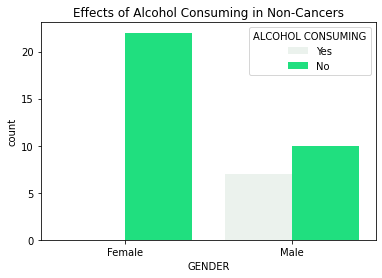

In [24]:
#     1-4هیستوگرام موارد منفی سرطان ریه بر اساس جنسیت و مصرف الکل
sns.countplot(data=data_temp_neg, x="GENDER", hue="ALCOHOL CONSUMING",color='springgreen',
              hue_order=["Yes","No"]).set(title='Effects of Alcohol Consuming in Non-Cancers')

[Text(0.5, 1.0, 'Effects of Alcohol Consuming')]

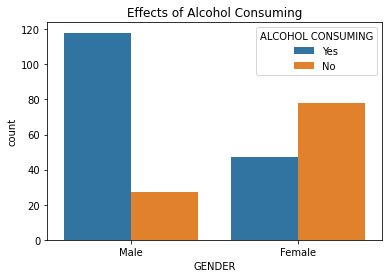

In [25]:
  #هستوگرام موارد مثبت سرطان ریه بر اساس جنسیت و مصرف الکل    4-2   
sns.countplot(data=data_temp_pos, x="GENDER", hue="ALCOHOL CONSUMING",
              hue_order=["Yes","No"]).set(title='Effects of Alcohol Consuming')

In [26]:
# نمونه های مثبت بر اساس مصرف الکل
sample = data[data['LUNG_CANCER']=='YES']['ALCOHOL CONSUMING'].value_counts()
pop = sample.sum()
# درصد الکلی های با سرطان مثبت
alcohol_percent = round(sample[2]/pop, 2)
noalcohol_percent = round(1- alcohol_percent, 2)
# خطای استاندارد
se = round(np.sqrt(alcohol_percent*noalcohol_percent/pop), 2)
# 3-4   فاصله اطمینان برای بررسی سرطان ریه در الکلی ها
print('Our Confidence Invterval for Alcoholics getting Cancer is: CI = ', round(alcohol_percent - 2*se, 2), 'to ', round(alcohol_percent+2*se, 2))

Our Confidence Invterval for Alcoholics getting Cancer is: CI =  0.55 to  0.67


### جواب4: براساس نمودارهای بالا با فاصله اطمینان  کمینه 0.55 درصد ، می توان نتیجه گرفت که مصرف الکل در ابتلای به سرطان ریه   موثر است

## سوال 5: کدام متغیرها با هم همبستگی دارند؟

###    1-5   بررسی علائم مرتبط با مثبت شدن سرطان ریه بر حسب جنسیت

In [27]:
symptoms = ['YELLOW_FINGERS', 'ANXIETY','FATIGUE ', 'ALLERGY ','WHEEZING', 'COUGHING',
            'SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN']

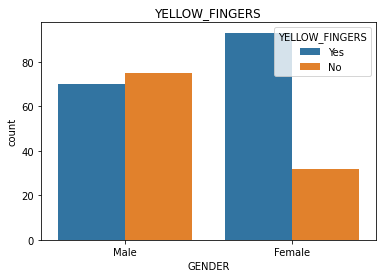

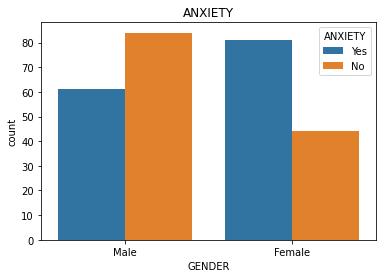

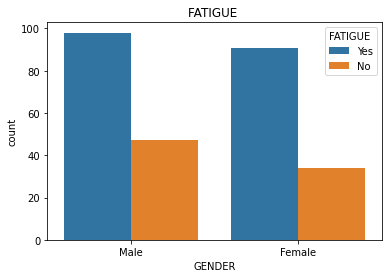

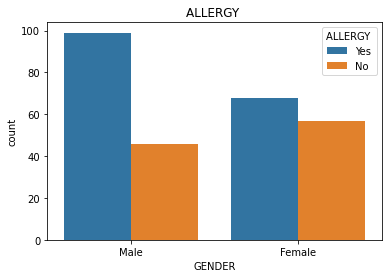

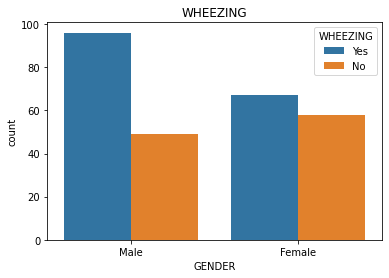

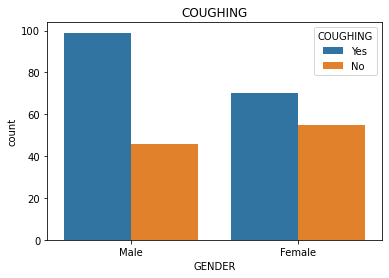

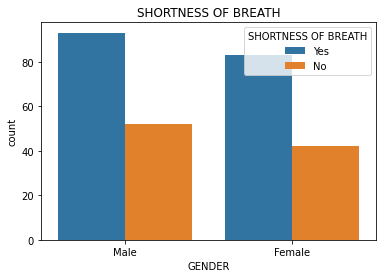

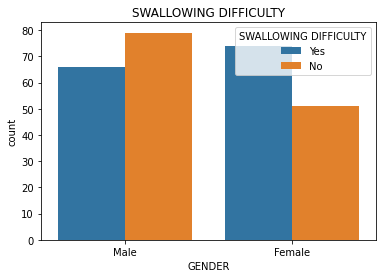

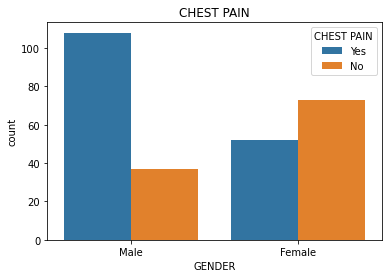

In [28]:
for feature in symptoms:
    plt.figure()
    sns.countplot(data=data_temp_pos, x="GENDER", hue=feature,
                  hue_order=["Yes","No"]).set(title= feature)

###     2-5    بررسی همبستگی بین متغیرها

#### ابتدا باید داده های اسمی را به داده های عددی تبدیل کنیم

In [29]:
LabelEncoder = LabelEncoder()
data1 = data.copy()
data1["GENDER"] = data1["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data1["LUNG_CANCER"] = LabelEncoder.fit_transform(data1["LUNG_CANCER"])
data1 = pd.get_dummies(data, columns= ["GENDER"])
data1.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE"}, inplace=True)

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


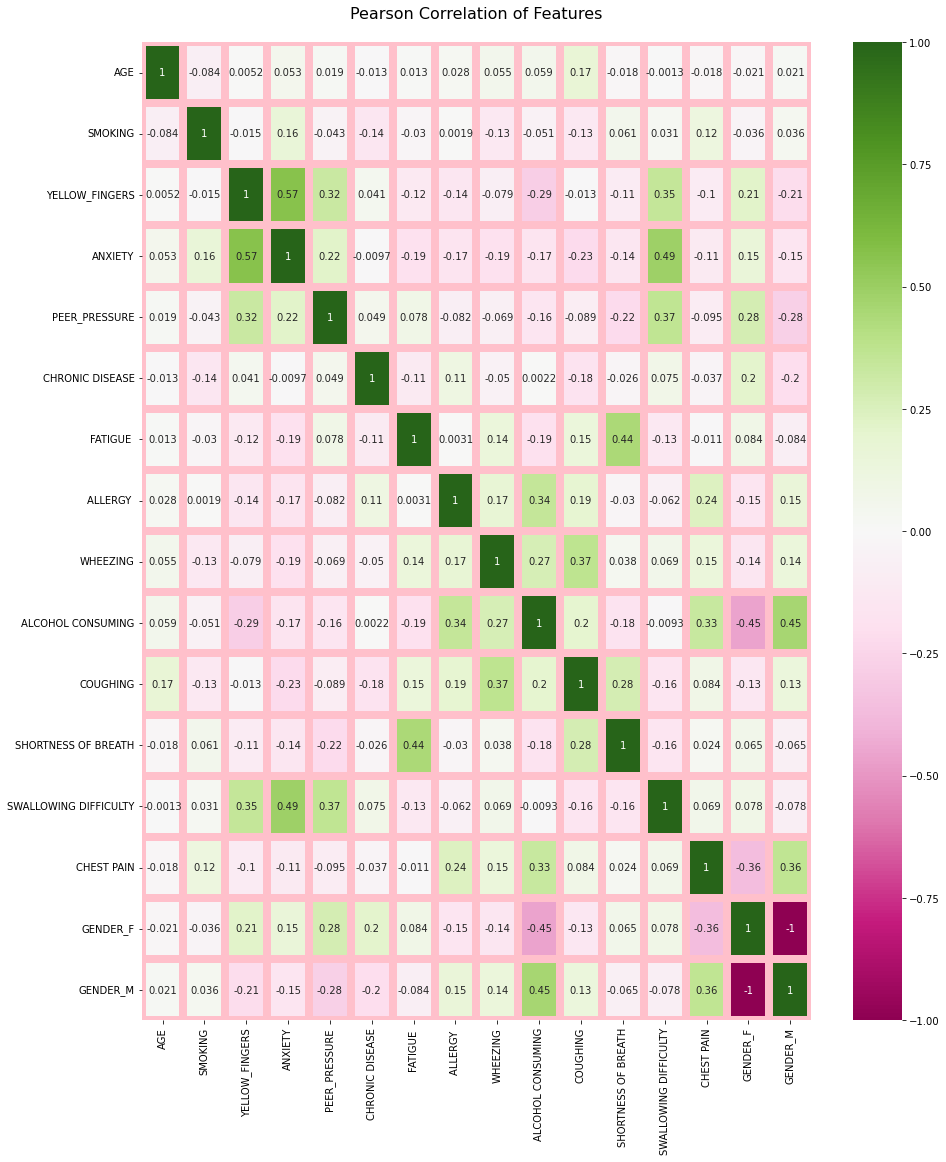

In [30]:
corr = data1.corr()
plt.figure(figsize=(15,18))

ax = sns.heatmap(corr, cmap='PiYG' ,linewidths=8, linecolor='pink',annot=True) 
plt.title("Pearson Correlation of Features\n", size=16)
plt.xticks(rotation=90) 
plt.show()

### جواب 5: بین جنسیت و مصرف الکل، بین مشکلات بلع و اضطراب، بین تنگی نفس وخستگی، بین اضطراب و انگشتان زرد رنگ همبستگی متوسط وجود دارد 

In [31]:
    data.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


### جواب 5: بین جنسیت و مصرف الکل، بین مشکلات بلع و اضطراب، بین تنگی نفس وخستگی، بین اضطراب و انگشتان زرد رنگ همبستگی متوسط وجود دارد 

## بخش 3: الگوریتم های طبقه بندی◧

###  ←←  آماده شدن برای مدل کردن الگوریتم ها

### پیش پردازش داده ها

In [32]:
 ##      ستون جنسیت و سرطان ریه را با 0 و 1 جایگزین می کنیم تا برای نوشتن مدل آماده شویم

data["GENDER"]= data["GENDER"].replace(["M","F"],[1,0])
data["LUNG_CANCER"]= data["LUNG_CANCER"].replace(["YES","NO"],[1,0])

 #### از آن جایی که یک متغیر هدف در داده های بیماران وجود دارد، طبقه بندی با روش یادگیری با نظارت زیر انجام می شود. ابتدا، متغیر هدف و ویژگی های مستقل جدا می شوند 

### انتخاب متغیرهای مستقل و وابسته

In [33]:
# انتخاب ویژگی ها
X= data.drop(["LUNG_CANCER"],axis=1)

# انتخاب متغیر کلاس
y= data["LUNG_CANCER"]

### تقسیم داده ها به آموزش و آزمون

In [53]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

### Baseline Model

### آموزش مدل پایه

In [54]:
# فراخوان مدل بیس لاین
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

### ارزیابی مدل پایه

In [56]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

TypeError: Singleton array array(DummyClassifier(strategy='stratified'), dtype=object) cannot be considered a valid collection.

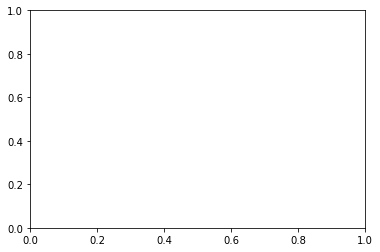

In [57]:
dummy_predict = dummy_clf.predict(X_test)
plot_confusion_matrix(dummy_clf, X_test, y_test, cmap='Greens')
print(classification_report(y_test, dummy_predict))
plt.show()

##      dummy accuracy : 0.80

###  آموزش مدل رگرسیون لجستیک

In [58]:
# فراخوان مدل رگرسیون لجستیک
lr_model = LogisticRegression(penalty="l2", C=1.0, solver="liblinear")
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

###  ارزیابی مدل رگرسیون لجستیک

TypeError: Singleton array array(LogisticRegression(solver='liblinear'), dtype=object) cannot be considered a valid collection.

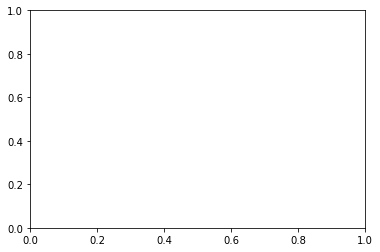

In [59]:
lr_predict = lr_model.predict(X_test)
plot_confusion_matrix(lr_model, X_test, y_test, cmap='Oranges')
print(classification_report(y_test, lr_predict))
plt.show()

##  LogisticRegression accuracy : 0.93                         

In [60]:
NewData= np.array([29, 1, 2,1,2,2,1,2,2,2,2,1,2,2,2]).reshape(1,-1)
lr_model.predict(NewData)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### KNN آموزش مدل 

In [61]:
# KNN فراخوان »مدل   
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### KNN ارزیابی مدل 

TypeError: Singleton array array(KNeighborsClassifier(n_neighbors=3), dtype=object) cannot be considered a valid collection.

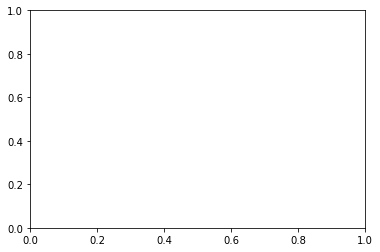

In [64]:
KNN_predict = KNN_classifier.predict(X_test)
plot_confusion_matrix(KNN_classifier, X_test, y_test, cmap='Oranges')
print(classification_report(y_test, KNN_predict))
plt.show()

##      KNN   accuracy : 0.90

### مقایسه نرخ خطاها با کی های مختلف

In [65]:
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

### نمودار میانگین خطای کی در مقادیر مختلف

Text(0, 0.5, 'Mean Error')

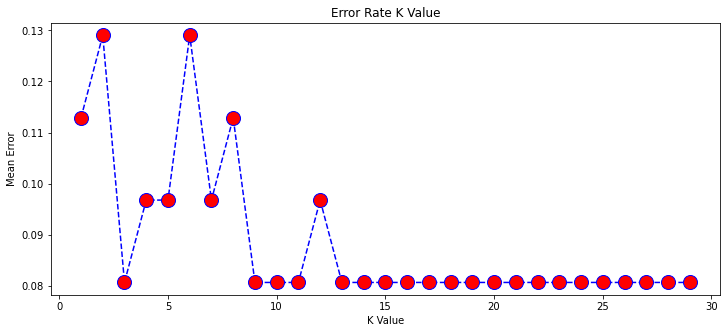

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=14)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### در مقادیر 3 و 9 و 10 و 11 و 13 تا 30  K
### کمترین نرخ خطا را برای الگوریتم "  کی ان ان "نشان می دهد
### K=3 انتخاب مناسبی است

### RandomForest آموزش مدل 

In [67]:
# فراخوان مدل جنگل تصادفی با عمق 5
rf_clf = RandomForestClassifier(max_depth=11, max_features=1, random_state=1234)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=1, random_state=1234)

### RandomForest ارزیابی مدل 

ValueError: Found input variables with inconsistent numbers of samples: [100, 62]

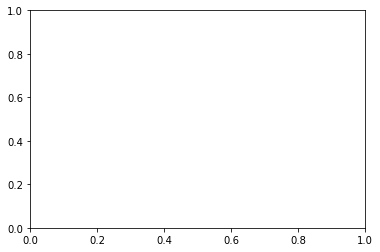

In [68]:
rf_predict = rf_clf.predict(X_test)
plot_confusion_matrix(rf_clf, X_test, y_test)
print(classification_report(y_test, rf_predict))
plt.show()

##      RandomForest   accuracy : 0.96

###   آموزش مدل نایو بیز 

In [69]:
# فراخوان مدل نایو بیز
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

### ارزیابی مدل نایو بیز

TypeError: Singleton array array(GaussianNB(), dtype=object) cannot be considered a valid collection.

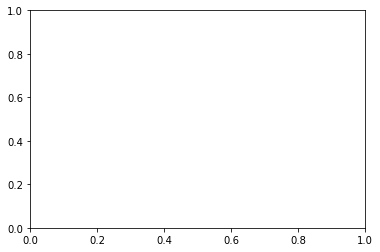

In [70]:
nb_predict = nb_clf.predict(X_test)
plot_confusion_matrix(nb_clf, X_test, y_test, cmap='Blues')
print(classification_report(y_test, nb_predict))
plt.show()

##     accuracy  naive bays : 0.93

#### سه الگوریتم با دقت های؛ رگرسیون لجستیک:93% ، جنگل تصادفی: 96% نایو بیز:93%  از خود نشان داده اند. بنابراین برای انتخاب بهترین الگوریتم از منحنی زیر استفاده می کنیم
### ROC

###    بخش 4: مقایسه الگوریتم های طبقه بندی* 

In [71]:
#  پیش بینی احتمالات برای هر الگوریتم
# Dummy طبقه بندی 
dummy_yhat = dummy_clf.predict_proba(X_test)
# Logistic Regression
lr_yhat = lr_model.predict_proba(X_test)
# KNN 
knn_yhat = KNN_classifier.predict_proba(X_test)
# Random Forest
rf_yhat = rf_clf.predict_proba(X_test)

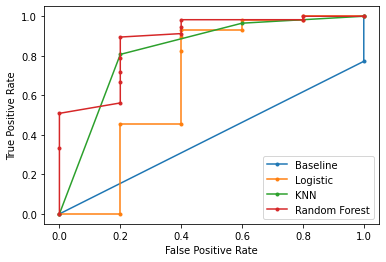

In [72]:
# بازیابی احتمالات برای کلاس مثبت
pos_probs = dummy_yhat[:,1]
pos_probs1 = lr_yhat[:, 1]
pos_probs2 = knn_yhat[:, 1]
pos_probs3 = rf_yhat[:, 1]

#  هر مدل «roc» محاسبه منحنی
fpr, tpr, _ = roc_curve(y_test, pos_probs)
fpr1, tpr1, _ = roc_curve(y_test, pos_probs1)
fpr2, tpr2, _ = roc_curve(y_test, pos_probs2)
fpr3, tpr3, _ = roc_curve(y_test, pos_probs3)
#  مدل roc رسم منحنی
plt.plot(fpr, tpr, marker='.', label='Baseline')
plt.plot(fpr1, tpr1, marker='.', label='Logistic')
plt.plot(fpr2, tpr2, marker='.', label='KNN')
plt.plot(fpr3, tpr3, marker='.', label='Random Forest')
# برچسب مجورها
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# نمایش لجندها
plt.legend()
# نمایش نمودار
plt.show()

### !براساس نمودار بالا، الگوریتم جنگل تصادفی بالاترین دقت را از خود نشان داده است 